# title 

### Author: Raghad Alotaibi

## Introduction 

the goal is to predecit the project's state (failed, success , canceled ) - classification problem 
- follow CRISP-DM 

some question can be answered: 
* What are the industries/categories of successful projects ? 
* How much is the amount/avg  of funding goal to start the project ?
* What are the characteristics of successful project ? / *feature importance*  
* Dose time of year the project is launched affect the it's success ? 
* Is project’s success depends on high donation money ? 
* 

# 1. Improt libraries 

In [1]:
import numpy as np
import pandas as pd

# 2. Read the data 

In [2]:
# reading the kickstarter projects data from google drive url 

url = 'https://drive.google.com/file/d/1JEd7JVsawso8GIGOe9j_U3j0zw1HpiZk/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [3]:
# the head of the dataset
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# the dataset shape with 15 attributes and 378661 records
df.shape

(378661, 15)

In [5]:
# the data types 
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

# 3. Explatorty Data Analysis  (EDA) & Data Preprocessing

In [6]:
# the number of rows & columns in the projects dataset

num_rows = df.shape[0] 
num_cols = df.shape[1]

print(num_rows)
print(num_cols)

378661
15


In [7]:
# remove unwanted columns 

df = df.drop(["ID", "usd pledged"], axis = 1)

In [8]:
# changing launched and deadline to date data type

df['launched'] = pd.to_datetime(df['launched']).dt.date
df['deadline'] = pd.to_datetime(df['deadline']).dt.date

In [9]:
df.dtypes

name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [10]:
# checking missing values 

df.isnull().sum()

name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [11]:
# handle missing values 

df = df.dropna()

In [12]:
# checking missing values 

df.isnull().sum()

name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [13]:
# droping duplicates 

df = df.drop_duplicates() 

In [14]:
# considering project state catoregies (success, failed)

df = df.loc[(df.state=='failed') | (df.state =='successful')]


# failed = 0
# successful = 1

df.loc[df.state == "failed", "state"] = 0
df.loc[df.state == "successful", 'state'] = 1


In [15]:
df.state.value_counts()

0    197715
1    133956
Name: state, dtype: int64

In [16]:
# removing wrong info od have the state as successful but there is 0 backers

df.loc[(df['state'] == 1) & (df['backers'] == 0), 'backers' ] = -1
df = df.loc[(df['backers'] != -1)]

In [17]:
# replacing N,0" country value based on currancy 

# first checking the countries value counts 
df.country.value_counts()

US      261357
GB       29453
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       105
LU          57
JP          23
Name: country, dtype: int64

In [18]:
# checking the countries' currency 

df.groupby(['currency','country'])['currency'].count()

currency  country
AUD       AU           6616
          N,0"            4
CAD       CA          12370
          N,0"            2
CHF       CH            652
DKK       DK            926
          N,0"            1
EUR       AT            485
          BE            523
          DE           3436
          ES           1873
          FR           2520
          IE            683
          IT           2369
          LU             57
          N,0"           17
          NL           2411
GBP       GB          29453
          N,0"            8
HKD       HK            477
JPY       JP             23
MXN       MX           1411
NOK       N,0"            1
          NO            582
NZD       NZ           1274
SEK       N,0"            1
          SE           1509
SGD       SG            454
USD       N,0"           71
          US         261357
Name: currency, dtype: int64

In [19]:
# removing N,0" country values with EUR currency because exaxt country can't be known 

df.loc[(df.currency == "EUR") & (df.country == "N,0\""), "country"] = "unknown"
df = df.loc[(df.country != "unknown")]

In [20]:
# Using dictionary to store Country - Currency pairs

without_N0 = df.loc[df.country != "N,0\""][["country", "currency"]]
without_N0.drop_duplicates(subset = None, keep = 'first', inplace = True)

without_N0.set_index('currency', inplace = True)
currency_country = without_N0.to_dict()['country']

In [21]:
# Changing country values for N,0"

df_N0 = df.loc[df.country == "N,0\""]
country_N0 = df_N0['currency'].apply(lambda x: currency_country[x])
indices = country_N0.index

df.loc[indices, "country"] = country_N0

In [22]:
# categorical data encoding 

#pd.get_dummies(df.main_category, prefix='Category', drop_first=True)
#pd.get_dummies(df.country, prefix='Category', drop_first=True)


#from sklearn.preprocessing import LabelEncoder

#lb_make = LabelEncoder()
#df['main_category'] = LabelEncoder().fit_transform(df['main_category'])


In [23]:
#  - normalizing numerical data
#from sklearn import preprocessing

#preprocessing.normalize(df.goal)

In [24]:
# resetting the index 

df = df.reset_index()
df.drop(['index'], inplace=True, axis=1)

df.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,0,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,0,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,0,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,0,1,US,1.0,5000.00
4,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,1,224,US,52375.0,50000.00
5,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01,1205.0,1,16,US,1205.0,1000.00
6,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01,453.0,0,40,US,453.0,25000.00
7,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09,0.0,0,0,CA,0.0,2406.39
8,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09,12700.0,1,100,US,12700.0,12500.00
9,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,2014-09-02,0.0,0,0,US,0.0,5000.00


# 4. Data Engienering / creating features 


# Takeaway 1

## What are the industries/categories of successful projects ? +
## What are the characteristics of successful project ? 

In [29]:
# storing the successful projects to successful_projects dataframe 
successful_projects = df.loc[df['state'] == 1]

In [30]:
# successful projects head 
successful_projects.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,1,224,US,52375.00,50000.00
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01,1205.0,1,16,US,1205.00,1000.00
11,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09,12700.0,1,100,US,12700.00,12500.00
14,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05,94175.0,1,761,GB,121857.33,6469.73
18,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02,250.0,1,7,US,250.00,250.00


In [1]:
import plotly as py
import plotly.graph_objs as go

In [32]:
#visualize 


successful_projects.main_category.value_counts()

Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

In [33]:
data = go.Bar(
    x=successful_projects.main_category.value_counts().keys(),
    y=successful_projects['main_category'].value_counts(),
    marker=dict(
        opacity=0.7,
        color='LightSkyBlue'
    )
)

layout = go.Layout(
    title=dict(
               text='Number of successful projects by category',
               x=0.5,
               xanchor= 'center'
              ),
    xaxis=dict(
               title='Category',
               tickmode='linear'
         ),
    yaxis=dict(
               title='Number of successful projects',
               tickprefix="   "
         )
)

#fig = 
go.Figure(data=data, layout=layout)
#py.offline.iplot(fig)

In [123]:
successful_projects.category.value_counts().count()

159

In [118]:
successful_projects.groupby(['main_category','category'])

In [131]:
data = go.Bar(
    x=successful_projects.category.value_counts().keys(),
    y=successful_projects['category'].value_counts(),
    marker=dict(
        opacity=0.7,
        color='Blue'
    ),
   # orientation='h'
)

layout = go.Layout(
    title=dict(
               text='Number of successful projects by category',
               x=0.5,
               xanchor= 'center'
              ),
    xaxis=dict(
               title='Category',
               tickmode='linear'
         ),
    yaxis=dict(
               title='Number of successful projects',
               tickprefix="   "
         ),
    barmode='group'
)

go.Figure(data=data, layout=layout)

In [133]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop', barmode='group')
fig.show()

### What are the characteristics of successful project ?

In [ ]:
1. pledged >= goal 
   feature importance [EXTRA TREE / RANDOM FOREST]
evaluate model
improve model

In [25]:
# drop unneeded features in the model 

df = df.drop(["name", "category", "deadline", "launched",], axis = 1)

In [26]:
#df = df[['main_category', 'currency', 'goal', 'pledged', 'backers','country','usd_pledged_real','usd_goal_real','state']]

In [27]:
#df['state'].astype(str).astype(int)

In [28]:
df.head()

,main_category,currency,goal,pledged,backers,country,usd_pledged_real,usd_goal_real,state
0,Publishing,GBP,1000.0,0.0,0,GB,0.0,1533.95,0
1,Film & Video,USD,30000.0,2421.0,15,US,2421.0,30000.00,0
2,Film & Video,USD,45000.0,220.0,3,US,220.0,45000.00,0
3,Music,USD,5000.0,1.0,1,US,1.0,5000.00,0
4,Food,USD,50000.0,52375.0,224,US,52375.0,50000.00,1


In [29]:
df2 = pd.get_dummies(df.iloc[:, :8])

In [32]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df2.values
y = df.state.values
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

forest = RandomForestClassifier(n_estimators=250,
                                random_state=42)

forest.fit(X_train, y_train)





RandomForestClassifier(n_estimators=250, random_state=42)

In [34]:
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.258336)
2. feature 3 (0.253852)
3. feature 2 (0.213052)
4. feature 4 (0.133739)
5. feature 0 (0.120378)
6. feature 15 (0.002899)
7. feature 18 (0.002660)
8. feature 19 (0.001672)
9. feature 9 (0.001209)
10. feature 12 (0.001068)
11. feature 13 (0.000950)
12. feature 55 (0.000807)
13. feature 5 (0.000792)
14. feature 10 (0.000708)
15. feature 33 (0.000702)
16. feature 6 (0.000649)
17. feature 43 (0.000612)
18. feature 11 (0.000591)
19. feature 25 (0.000534)
20. feature 8 (0.000465)
21. feature 24 (0.000456)
22. feature 17 (0.000367)
23. feature 7 (0.000315)
24. feature 49 (0.000231)
25. feature 28 (0.000211)
26. feature 37 (0.000198)
27. feature 21 (0.000196)
28. feature 31 (0.000183)
29. feature 53 (0.000175)
30. feature 16 (0.000149)
31. feature 40 (0.000139)
32. feature 35 (0.000137)
33. feature 20 (0.000136)
34. feature 46 (0.000136)
35. feature 23 (0.000127)
36. feature 14 (0.000116)
37. feature 39 (0.000107)
38. feature 50 (0.000094)
39. feature 42

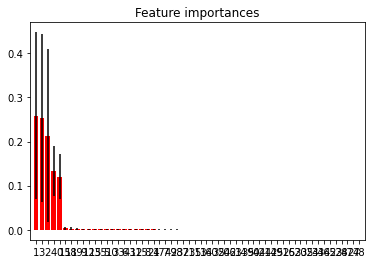

In [35]:
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [50]:
category_names = ['failed', 'successful']

# assigning the model's predictions to y_pred value 
y_pred = forest.predict(X_test)

# evaluating the model using model's accuracy and classification report 
class_report = classification_report(y_test, y_pred, target_names=category_names, zero_division=0)

print("The model's Accuracy:  ",(y_pred == y_test).mean())
print("\nClassification Report: \n",class_report)

The model's Accuracy:   0.9980244307042678

 Classification Report: 
               precision    recall  f1-score   support

      failed       1.00      1.00      1.00     39585
  successful       1.00      1.00      1.00     26725

    accuracy                           1.00     66310
   macro avg       1.00      1.00      1.00     66310
weighted avg       1.00      1.00      1.00     66310



In [48]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([39585, 26725]))

### How much is the amount/avg of funding goal to start the project ?

### Is the project’s success depend on high donation money ?

In [ ]:
it has to reach the goal to consider successful so it depends on the goal 

### Dose time of year the project is launched affect the it's success ? / givin the category of the project 